In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets
from galvo_controller import GalvoScannerController
from main import ScanningMicroscope
import json
import time
import live_plot
# Set up matplotlib for inline plotting
%matplotlib inline

## Microscope initialization

In [2]:
# Initialize the microscope
microscope = GalvoScannerController()
print("Microscope initialized successfully!")

Successfully initialized DAQ connection
Microscope initialized successfully!


## Set microscope to (0,0)

In [3]:
microscope.close()

## Live photon count
This cell provides real-time monitoring of photon counts from the single-photon detector (SPD). The visualization updates every 0.1 seconds and displays the last 100 data points.


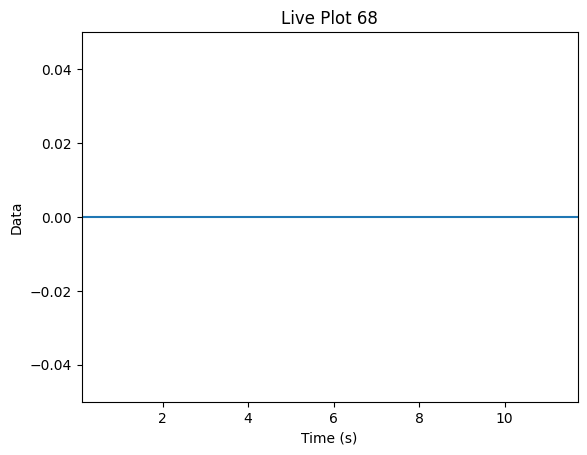

In [4]:


def measure_photons():
    try:
        # Read photon counts for 0.1 seconds
        counts = microscope.read_spd_count_tt(sampling_time=0.1)
        # Convert to counts per second
        return counts  # Multiply by 10 since we sampled for 0.1s
    except Exception as e:
        print(f"Error reading photon counts: {str(e)}")
        return 0


live_plot.live_plot(
            measure_function=measure_photons,
            histogram_range=100,  # Show last 100 points
            dt=0.1  # Update every 0.1 seconds
        )

## APD Scanning


In [5]:
from napari_scanning_apd import *

Successfully initialized DAQ connection


(Make sure 'QVector<int>' is registered using qRegisterMetaType().)


INFO: New scan started
-0.07480635606070721
0.04000671387999321
0.014934568280350266
0.13772037071298734
0.13463046003429419
0.14931707251944068
0.16033203188330056
0.2726369335879013
0.2921014635113974
0.3110986921285479
0.2556424248550889
0.3887756133568065
0.396900934030407
0.3977401690295582
0.3966720517579112
0.3836639092710672
0.42546353428561073
0.4967317518839872
0.4944429291590293
0.5274973440119629
0.6811441061861156
0.6299316977151828
0.61114427784782
0.624152420334664
0.6549275492239938
0.7403864677171091
0.7935348387429022
0.8295170393315112
0.8641259462851454
0.8949201486971831
0.8587281393587863
0.9631652129463443
0.9612101768687761
0.9762496495240203
0.9617823825500156
1.0741445048227403
1.1302015880615006
1.1627791648467347
1.1499999046323865
1.1468909204309854
1.262533688609483
1.2696385758182065
1.3334585827991157
1.358330456410325
1.3297106355869972
1.299450491810783
1.376650574971342
1.3718154369648685
1.4949827098516653
1.4261559031599105
1.540673333498637
1.57923

## SPD Scanning